Loads an RDS of the MPMF_QC database that can be used for EDA. 

In [1]:
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.3     v dplyr   1.0.1
v tidyr   1.1.1     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [15]:
mpmf_data <- readRDS("MPMF_QC_DB.rds")

In [16]:
# remove obvious outliers
mpmf_data <- filter(mpmf_data, mpmf_data$value > -10)
mpmf_data <- filter(mpmf_data, mpmf_data$value < 100)

In [17]:
str(mpmf_data)

'data.frame':	689234 obs. of  7 variables:
 $ metric         : Factor w/ 32 levels "Air Injection",..: 24 24 24 24 24 24 24 24 24 24 ...
 $ metric_type    : Factor w/ 3 levels "morpheus","mzmine",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ component_name : Factor w/ 31 levels "Alanine","Benzimidazole",..: 10 11 12 13 14 15 16 17 18 19 ...
 $ experiment_type: Factor w/ 2 levels "metabolomics",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ machine_name   : Factor w/ 7 levels "fusion","qeclassic",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ date_time      : POSIXct, format: "2019-08-30 01:14:55" "2019-08-30 01:14:55" ...
 $ value          : num  19.6 21.8 24.2 25.6 26.7 ...


## Boxplots

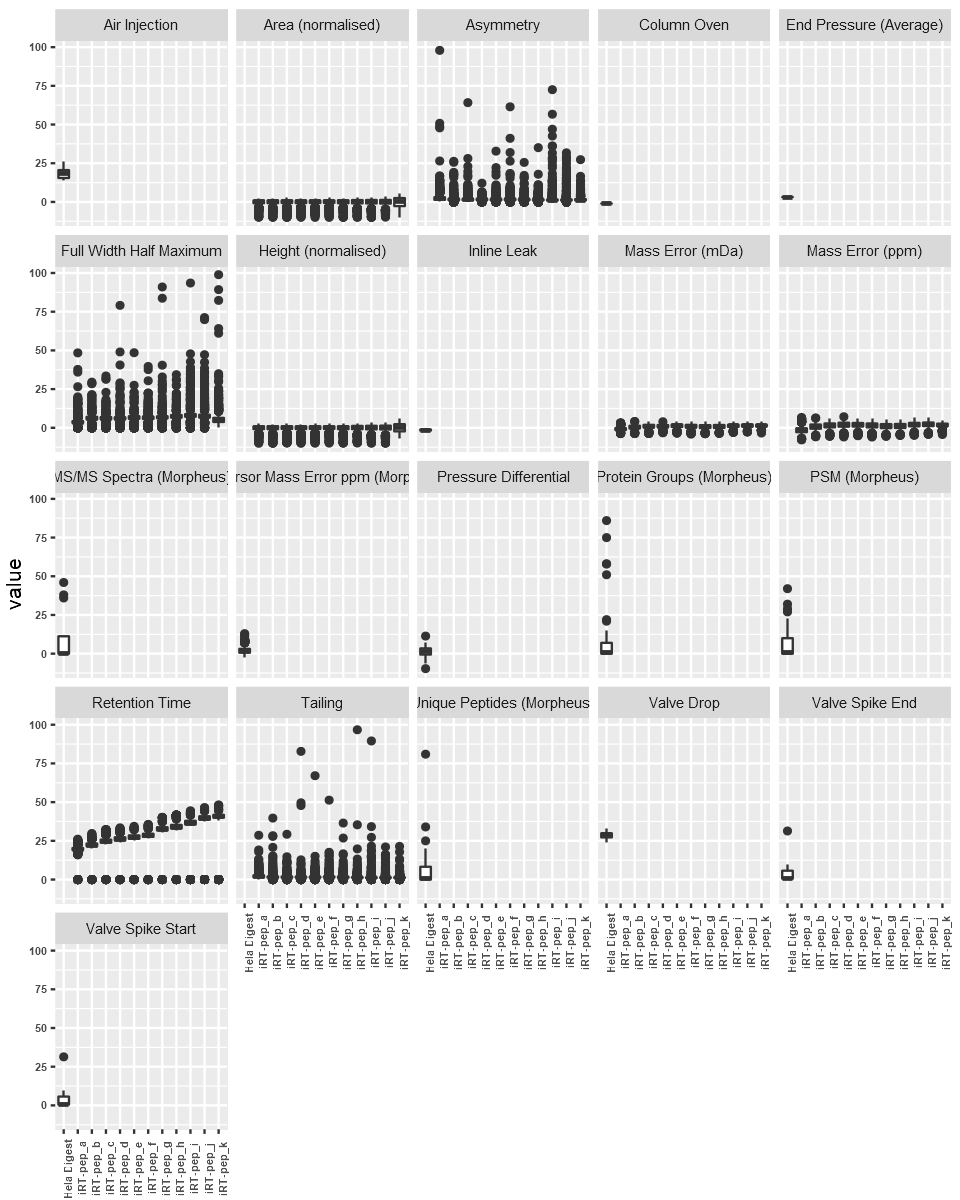

In [25]:
# Some example code, further filtering and wrangling needed
options(repr.plot.height = 10, repr.plot.width = 8)


# filter by machine
plot_data <- filter(mpmf_data, mpmf_data$machine_name == "qeplus1")

# filter by metric
#plot_data <- filter(mpmf_data, mpmf_data$metric == "Full Width Half Maximum")


g <- ggplot(plot_data, aes(x=component_name, y=value)) + geom_boxplot() + facet_wrap(~metric)

g + theme(plot.title=element_text(size=20, hjust=0.5,lineheight=1.2),  # title
                    axis.title.x=element_blank(),  # X axis title
                    axis.title.y=element_text(size=12,vjust=2),  # Y axis title
                   axis.text.x=element_text(size=6,face="bold", angle = 90),  # X axis text
                   axis.text.y=element_text(size=6,face="bold"))

In [8]:
levels(mpmf_data$metric)

[1] "Air Injection"                       "Area"                               
 [3] "Area (normalised)"                   "Asymmetry"                          
 [5] "Column Oven"                         "End Pressure (Average)"             
 [7] "End Pressure (Median)"               "Full Width Half Maximum"            
 [9] "Height"                              "Height (normalised)"                
[11] "Inline Leak"                         "Mass Error (mDa)"                   
[13] "Mass Error (ppm)"                    "Mass to Charge Ratio (mz)"          
[15] "Maximum Pressure"                    "Minimum Pressure"                   
[17] "MS/MS Spectra (Morpheus)"            "mz Maximum"                         
[19] "mz Minimum"                          "Precursor Mass Error ppm (Morpheus)"
[21] "Pressure Differential"               "Protein Groups (Morpheus)"          
[23] "PSM (Morpheus)"                      "Retention Time"                     
[25] "Retention Time at Maximum Pressure"  "Starting Backpressure (Average)"    
[27] "Starting Pressure (Median)"          "Tailing"                            
[29] "Unique Peptides (Morpheus)"          "Valve Drop"                         
[31] "Valve Spike End"                     "Valve Spike Start"

In [19]:
summary(mpmf_data$value)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-9.9977  0.2376  1.3392  4.9307  3.8658 99.7943 

## Line Charts

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


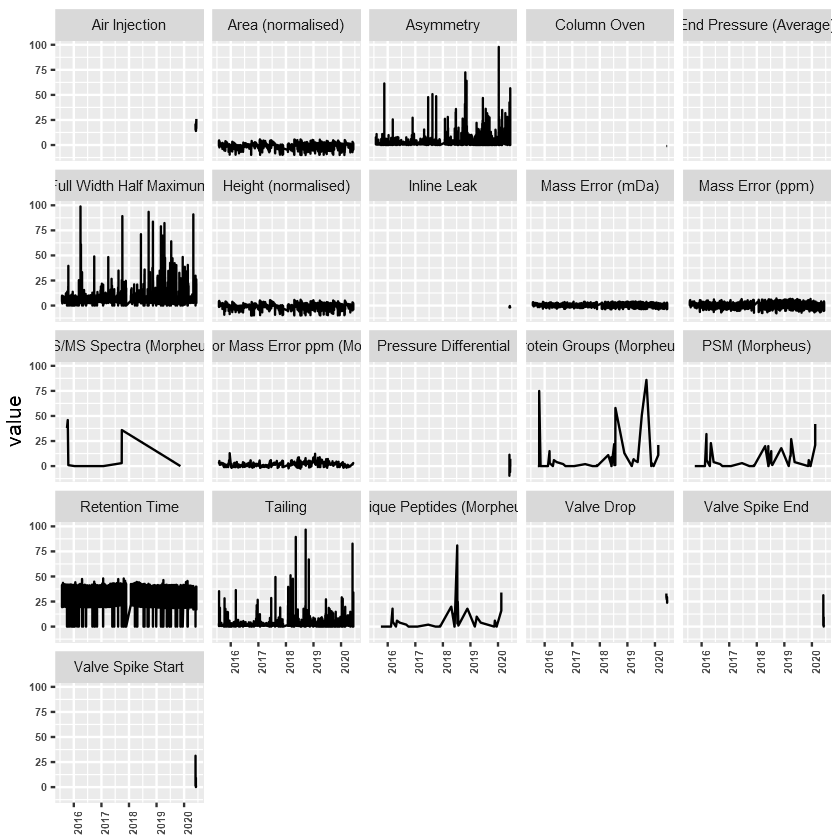

In [24]:
# Some example code, further filtering and wrangling needed

# filter by machine
plot_data <- filter(mpmf_data, mpmf_data$machine_name == "qeplus1")

# filter by metric
#plot_data <- filter(mpmf_data, mpmf_data$metric == "Full Width Half Maximum")


g <- ggplot(plot_data, aes(x=date_time, y=value)) + geom_line() + facet_wrap(~metric)

g + theme(plot.title=element_text(size=20, hjust=0.5,lineheight=1.2),  # title
                    axis.title.x=element_blank(),  # X axis title
                    axis.title.y=element_text(size=12,vjust=2),  # Y axis title
                   axis.text.x=element_text(size=6,face="bold", angle = 90),  # X axis text
                   axis.text.y=element_text(size=6,face="bold"))

## Histogram

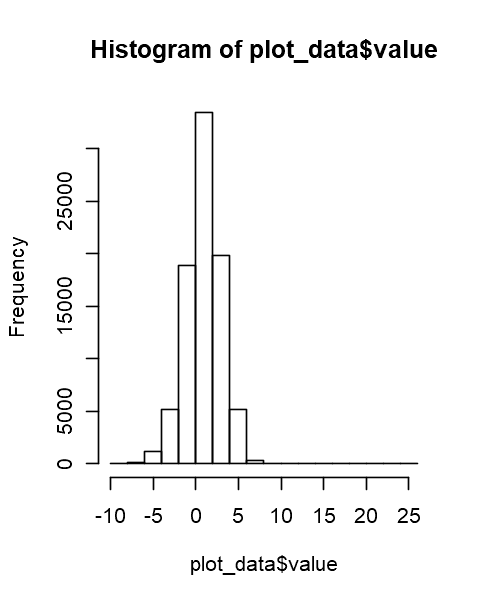

In [34]:
# filter by machine
plot_data <- filter(mpmf_data, mpmf_data$machine_name == "qehf1")

# filter by metric
options(repr.plot.height = 5, repr.plot.width = 4)
plot_data <- filter(mpmf_data, mpmf_data$metric == "Mass Error (ppm)")
hist(plot_data$value)